In [ ]:
#marwa mostafa attia kaoud
#section 3
#bench no = 33846



In [1]:

#loading data into data array
% matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
data=np.loadtxt("Data.txt")


(4417524, 2)

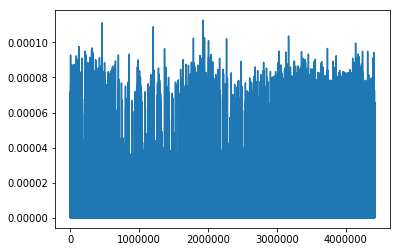

In [3]:

#rectifing to get the start position of each spike
rectified=np.abs(data)
plt.plot(rectified[:,0])
#plt.plot(rectified[1:500,0])
#plt.axhline(linewidth=4,color='r')
rectified.shape         

In [80]:
###############electrode_1#################
#thr=3*standard deviation 
electrode1=0

e1_std=np.std(rectified[0:20000,electrode1],0) #standartd deciation of the first ...... samples
e1_std1=np.std(data[:,electrode1],0)

#thresould calcultion 
e1_thr1=3.5*e1_std
e1_thr2=5*e1_std1

###############electrode_2#################
#thr=3*standard deviation 

electrode2=1
e2_std=np.std(rectified[0:20000,electrode2]) #standartd deciation of the first ...... samples
e2_std1=np.std(data[:,electrode2])

#thresould calcultion 
e2_thr1=3.5*e2_std
e2_thr2=5*e2_std


Text(0.5, 1.0, 'e1_3.5_thresould')

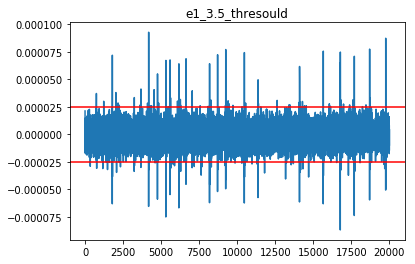

In [4]:
# 3.5 threshould for electrode 1
plt.plot(data[0:20000,electrode1])
plt.axhline(y=e1_thr1,color="r")
plt.axhline(y=-e1_thr1,color="r")
plt.title("e1_3.5_thresould")

Text(0.5, 1.0, 'e1_5_thresould')

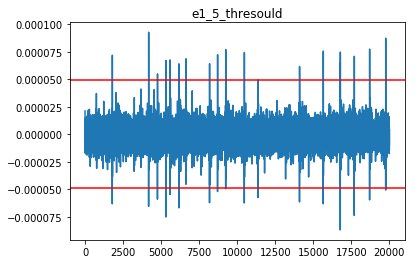

In [81]:

# 5 threshould for electrode 1
plt.plot(data[0:20000,electrode1])
plt.axhline(y=e1_thr2,color="r")
plt.axhline(y=-e1_thr2,color="r")
plt.title("e1_5_thresould")

Text(0.5, 1.0, 'e2_3.5_thresould')

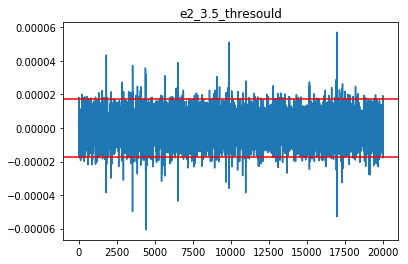

In [60]:
# 3.5 thresh. electrode 2
plt.plot(data[0:20000,electrode2])
plt.axhline(y=e2_thr1,color="r")
plt.axhline(y=-e2_thr1,color="r")
plt.title("e2_3.5_thresould")

Text(0.5, 1.0, 'e2_5_thresould')

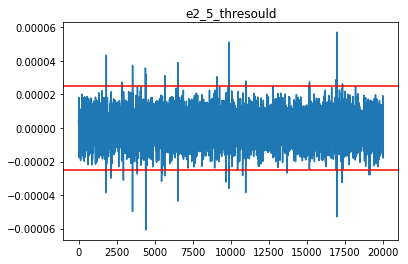

In [14]:

# 5 thresh. electrode 2
plt.plot(data[0:20000,electrode2])
plt.axhline(y=e2_thr2,color="r")
plt.axhline(y=-e2_thr2,color="r")
plt.title("e2_5_thresould")

2314
[1789, 4177, 4758, 5309, 5583, 6163, 6636, 8178, 8706, 9241]
2314

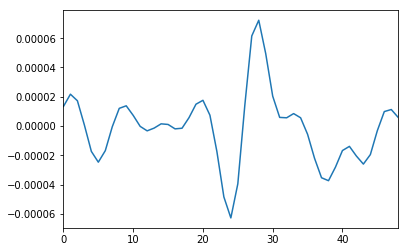

In [15]:
#for electrode1 thr1
e1_th1_timestamps=[]
e1_th1_timestamps=detecting_spikes(e1_th1_timestamps,electrode1,e1_thr1)
getting_the_peak_of_each_spike(e1_th1_timestamps,electrode1)
e1_th1_aligned=alignment(e1_th1_timestamps,electrode1)


2314
[1789, 4177, 4758, 5309, 5583, 6163, 6636, 8178, 8706, 9241]
2314

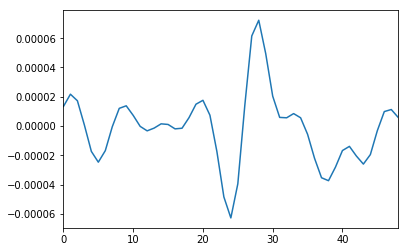

In [82]:

#for electrode1 thr2
e1_th2_timestamps=[]
e1_th2_timestamps=detecting_spikes(e1_th2_timestamps,electrode1,e1_thr2)
getting_the_peak_of_each_spike(e1_th2_timestamps,electrode1)
e1_th2_aligned=alignment(e1_th2_timestamps,electrode1)


34708
[12, 110, 233, 318, 368, 441, 555, 626, 799, 859]


34708


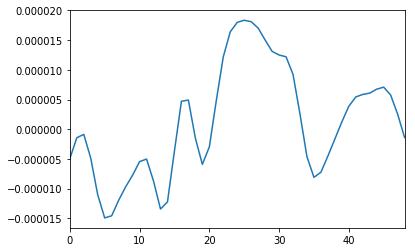

In [71]:

#for electrode2 thr1
e2timestamps=[]
e2_th1_timestamps=detecting_spikes(e2timestamps,electrode2,e2_thr1)
getting_the_peak_of_each_spike(e2timestamps,electrode2)
e2_th1_aligned=alignment(e2timestamps,electrode2)

34708
[12, 110, 233, 318, 368, 441, 555, 626, 799, 859]


34708


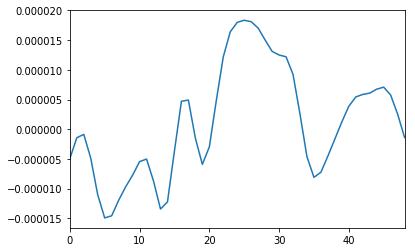

In [70]:

#for electrode2 thr2
e2_th2_timestamps=[]
e2_th2_timestamps=detecting_spikes(e2_th2_timestamps,electrode2,e2_thr2)
getting_the_peak_of_each_spike(e2_th2_timestamps,electrode2)
e2_th2_aligned=alignment(e2_th2_timestamps,electrode2)


In [14]:
def detecting_spikes(time_stamps, electrode,thr):
  n_spikes=0
  #time_stamps=[]
  #Ts=1/ 24414 
  i=0
  while(i<len(rectified[:,electrode])):
    if(rectified[i,electrode]>=thr):  
        time_stamps.append(i)
        n_spikes=n_spikes+1
        i=i+48
    else : i=i+1
  print(n_spikes)
  print(time_stamps[0:10])
  return time_stamps


In [16]:

#marking spikes
"""""
plt.plot(rectified[0:20000,electrode1],color="darkblue")
plt.axhline(y=thr1,color="r")
for stamp in range(len(time_stamps)):
    if (time_stamps[stamp] < 20000):
     plt.scatter(time_stamps[stamp],0.000125,marker="*",s=20,color="y")
plt.title("")
"""

In [44]:

#getting the peak of each spike
def getting_the_peak_of_each_spike (time_stamps,electrode):
 for index in range(len(time_stamps)):
   for index2 in range (0,48):
      if(time_stamps[index]+index2<len(rectified)): 
       peak=rectified[time_stamps[index]+index2,electrode]
       if(peak>time_stamps[index]):
          print("iam here")
          time_stamps[index]=peak
 #plt.plot(time_stamps[0:10])
 #return time_stamps


In [15]:
#aligning spikes
spikes=np.ndarray((len(time_stamps),49))
for l in range(len(time_stamps)):   
    j=24
    while(j>0):
       sample=data[time_stamps[l]-j,electrode1]
       spikes[l][24-j]=sample
       j=j-1
    spikes[l][24]=data[time_stamps[l],electrode1]
    j=1
    while(j<24):
       sample=data[time_stamps[l]+j,electrode1]
       spikes[l][24+j]=sample
       j=j+1
#print(len(spikes[0]))
#plt.plot(spikes[1])
spikes.shape

In [69]:
def alignment(time_stamps,electrode) :
 aligned=np.ndarray((len(time_stamps),49))
 print(len(time_stamps))
 for ll in range (len(time_stamps)):
    j=-24
    while(j<=24):
        aligned[ll][24+j]=data[time_stamps[ll]+j,electrode]
        j+=1
 plt.plot(aligned[1000])   
 plt.xlim(0,48)
 return aligned

In [ ]:

#applying PCA on array of spikes of 48 dimensions
def apply_pca (spikes):
 from sklearn.decomposition import PCA
 #scaled_spikes=preprocessing.scale(spikes)
 pca=PCA(n_components=2)
 pca.fit(spikes)
 transformed_data=pca.transform(spikes)
 #transformed_data=pca.fit_transform(aligned)
 plt.scatter(transformed_data[:,0],transformed_data[:,1], color='b')
 plt.axis((-0.00015, 0.00025, -0.00015, 0.00025))
 return transformed_data


In [ ]:

def k_clusering (transformed_data):
 from sklearn.cluster import KMeans 
 x=np.array(transformed_data)
 #plt.scatter(transformed_data[:0],transformed_data[:1],color="black")
 kmeans = KMeans(n_clusters=2)  
 kmeans.fit(x) 
 plt.scatter(x[:,0],x[:,1], c=kmeans.labels_, cmap='rainbow')
 plt.axis((-0.00015, 0.00025, -0.00015, 0.00025))
 a=kmeans.labels_
 return np.array(a)


In [ ]:
def avg_spikes (s):
 from sklearn.decomposition import PCA   
 pca=PCA(n_components=2)
 pca.fit(s)
 transformed_data=pca.transform(s)
 from sklearn.cluster import KMeans 
 x=np.array(transformed_data)
 kmeans = KMeans(n_clusters=2)  
 kmeans.fit(x) 
 avg_spikes=[]
 labels=[]
 labels=kmeans.labels_
 neoron_1=[]
 neoron_2=[]

 for k in range(len(s)):
   if (labels[k] == 0):
       neoron_1.append(s[k])
   elif (labels[k] == 1):
       neoron_2.append(s[k])     
 avg_spikes.append([])
 avg_spikes[0]=np.mean(neoron_1,axis=0)
 avg_spikes.append([])
 avg_spikes[1]=np.mean(neoron_2,axis=0)
 plt.plot(avg_spikes[0],color="green")
 plt.plot(avg_spikes[1],color="purple")
 return labels


In [104]:

def marking_spikes (electrode,time_stamps,labels):
 plt.plot(data[0:20000,electrode])
 for stamp in range(len(time_stamps)):
    if (time_stamps[stamp] < 20000):
         if (labels[stamp] == 0):
           plt.scatter(time_stamps[stamp],data[time_stamps[stamp],electrode],marker="*",color="red")
         elif (labels[stamp] == 1):
           plt.scatter(time_stamps[stamp],data[time_stamps[stamp],electrode],marker="*",color="y") 


Text(0.5, 1.0, 'FeatureSpace_1_3_5.jpg')

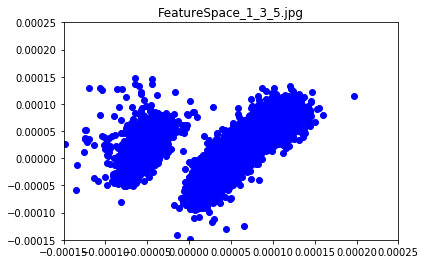

In [37]:
#for electrode1 thr1
apply_pca(e1_th1_aligned)
plt.title("FeatureSpace_1_3_5.jpg")


array([0, 1, 0, ..., 1, 0, 0])

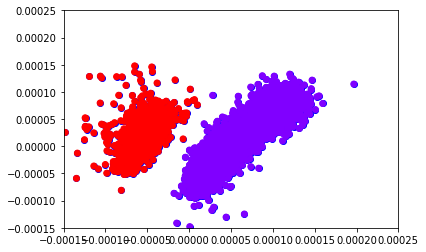

In [42]:

k_clusering(apply_pca(e1_th1_aligned))


Text(0.5, 1.0, 'Templates_3.5_electrode_1')

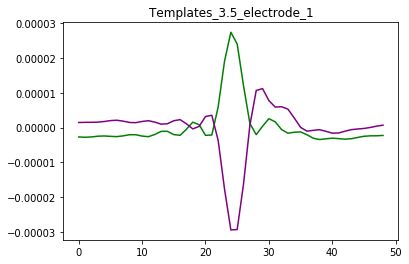

In [43]:
l1=[]
l1=avg_spikes(e1_th1_aligned)
plt.title("Templates_3.5_electrode_1")

Text(0.5, 1.0, 'DetectedSpikes_1_3_5.jpg')

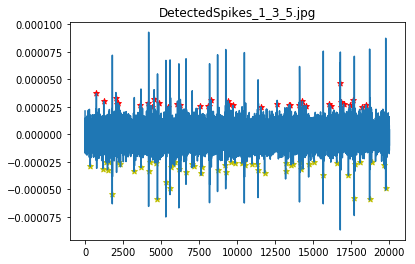

In [44]:

marking_spikes(electrode1,e1_th1_timestamps,l1)
plt.title("DetectedSpikes_1_3_5.jpg")

Text(0.5, 1.0, 'FeatureSpace_1_5.jpg')

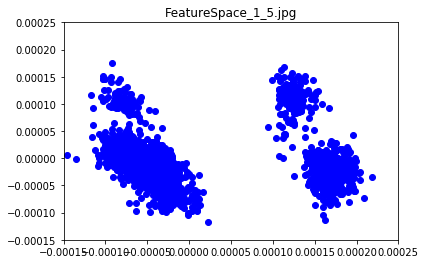

In [97]:

#for electrode1 thr2
apply_pca(e1_th2_aligned)
plt.title("FeatureSpace_1_5.jpg")


array([1, 1, 1, ..., 1, 1, 1])

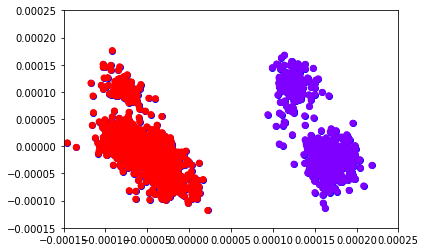

In [98]:

k_clusering(apply_pca(e1_th2_aligned))


Text(0.5, 1.0, 'Templates3_5_electrode_1')

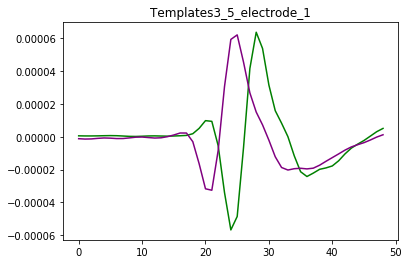

In [99]:
l2=[]
l2=avg_spikes(e1_th2_aligned)
plt.title("Templates3_5_electrode_1")


Text(0.5, 1.0, 'DetectedSpikes_1_3_5')

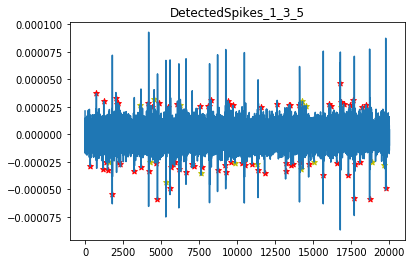

In [101]:

marking_spikes(electrode1,e1_th1_timestamps,l2)
plt.title("DetectedSpikes_1_3_5")

Text(0.5, 1.0, 'FeatureSpace_2_3_5.jpg')

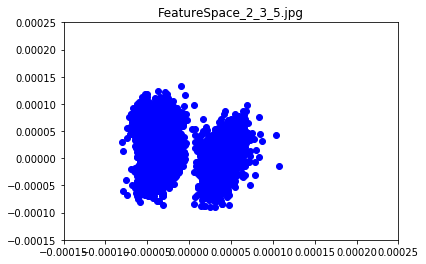

In [72]:

#for electrode2 thr1
apply_pca(e2_th1_aligned)
plt.title("FeatureSpace_2_3_5.jpg")


array([0, 1, 0, ..., 0, 0, 1])

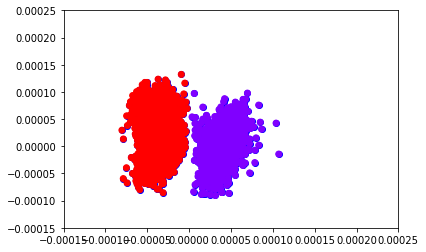

In [73]:

k_clusering(apply_pca(e2_th1_aligned))


Text(0.5, 1.0, 'Templates_3.5_electrode_2')

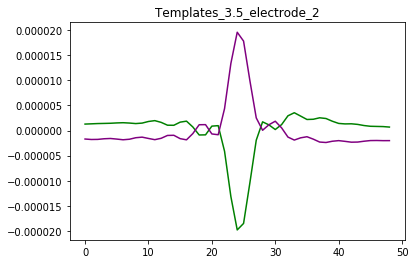

In [74]:
l3=[]
l3=avg_spikes(e2_th1_aligned)
plt.title("Templates_3.5_electrode_2")

Text(0.5, 1.0, 'DetectedSpikes_2_3_5')

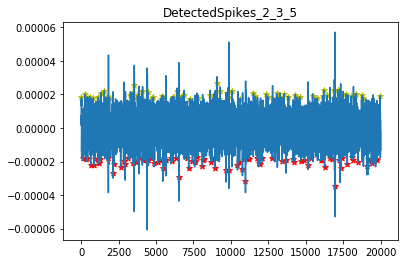

In [75]:
marking_spikes(electrode2,e2_th1_timestamps,l3)
plt.title("DetectedSpikes_2_3_5")

Text(0.5, 1.0, 'FeatureSpace_2_5.jpg')

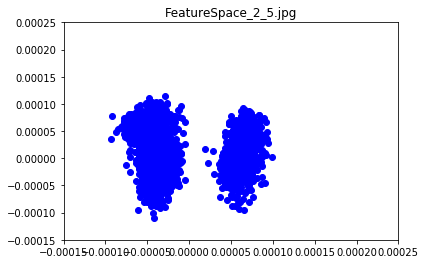

In [93]:

#for electrode2 thr2
apply_pca(e2_th2_aligned)
plt.title("FeatureSpace_2_5.jpg")


array([0, 0, 1, ..., 0, 0, 0])

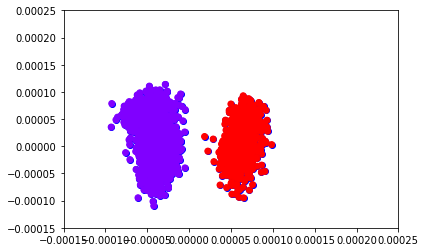

In [94]:

k_clusering(apply_pca(e2_th2_aligned))

Text(0.5, 1.0, 'Templates_5_electrode_2')

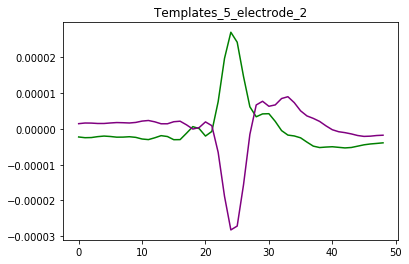

In [95]:
l4=[]
l4=avg_spikes(e2_th2_aligned)
plt.title("Templates_5_electrode_2")


Text(0.5, 1.0, 'DetectedSpikes_2_5')

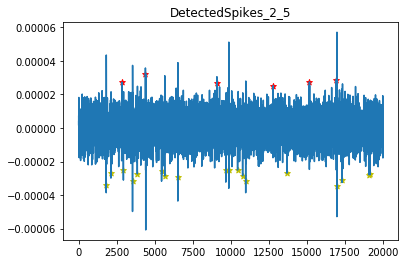

In [96]:

marking_spikes(electrode2,e2_th2_timestamps,l4)
plt.title("DetectedSpikes_2_5")

